In [2]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_rows', None)
pd.reset_option('display.max_rows', None)
#test change

In [3]:
#get=GEO_ID,NAME,EMP,NATION,PAYANN,STATE,YEAR
apikey = 'af4a7c461bcda111515e0ebeea5e4124fcc267d6'
get = 'GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP,ETH_GROUP_LABEL,RACE_GROUP,RACE_GROUP_LABEL,VET_GROUP,VET_GROUP_LABEL,EMPSZFI,EMPSZFI_LABEL,YEAR,FIRMPDEMP,FIRMPDEMP_F,RCPPDEMP,RCPPDEMP_F,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,FIRMPDEMP_S_F,RCPPDEMP_S,RCPPDEMP_S_F,EMP_S,EMP_S_F,PAYANN_S,PAYANN_S_F'
#removed non labled versions of rows
url = f"https://api.census.gov/data/2018/abscs?get={get}&for=us:*&key={apikey}"
stateurl = url = f"https://api.census.gov/data/2018/abscs?get={get}&for=state:*&key={apikey}"

r = requests.get(url)
print(r)
stater = requests.get(stateurl)
print(stater)

r = r.json()
r = json.dumps(r)

stater = stater.json()
stater = json.dumps(stater)

<Response [200]>
<Response [200]>


In [4]:

p = pd.read_json(r)
p.head(10)

headers = p.iloc[0]
new_p  = pd.DataFrame(p.values[1:], columns=headers)
#remove columns we don't need
new_p = new_p.drop(columns =['SEX', 'ETH_GROUP', 'RACE_GROUP', 'VET_GROUP', 'EMPSZFI', 'FIRMPDEMP_S_F', 'PAYANN_S_F', 'YEAR','RCPPDEMP_S_F'])


In [5]:

statedatap = pd.read_json(stater)
statedatap.head(10)

headers = statedatap.iloc[0]
statedata  = pd.DataFrame(statedatap.values[1:], columns=headers)
#remove columns we don't need
statedata = statedata.drop(columns =['ETH_GROUP', 'RACE_GROUP', 'VET_GROUP', 'EMPSZFI', 'FIRMPDEMP_S_F', 'PAYANN_S_F', 'YEAR','RCPPDEMP_S_F'])
statedata

,GEO_ID,NAME,NAICS2017,NAICS2017_LABEL,SEX,SEX_LABEL,ETH_GROUP_LABEL,RACE_GROUP_LABEL,VET_GROUP_LABEL,EMPSZFI_LABEL,...,EMP,EMP_F,PAYANN,PAYANN_F,FIRMPDEMP_S,RCPPDEMP_S,EMP_S,EMP_S_F,PAYANN_S,state
0,0400000US28,Mississippi,00,Total for all sectors,001,Total,Non-Hispanic,Total,Equally veteran/nonveteran,Firms with 1 to 4 employees,...,0,g,0,S,0.0,0.0,0.0,S,0.0,28
1,0400000US28,Mississippi,00,Total for all sectors,001,Total,Non-Hispanic,Total,Equally veteran/nonveteran,Firms with 5 to 9 employees,...,1742,None,43830,None,44.0,0.0,44.5,None,43.5,28
2,0400000US28,Mississippi,00,Total for all sectors,001,Total,Non-Hispanic,Total,Equally veteran/nonveteran,Firms with 10 to 19 employees,...,0,g,0,D,0.0,0.0,0.0,D,0.0,28
3,0400000US28,Mississippi,00,Total for all sectors,001,Total,Non-Hispanic,Total,Equally veteran/nonveteran,Firms with 20 to 49 employees,...,0,c,0,D,0.0,0.0,0.0,D,0.0,28
4,0400000US28,Mississippi,00,Total for all sectors,001,Total,Non-Hispanic,Total,Equally veteran/nonveteran,Firms with 50 to 99 employees,...,0,h,0,D,0.0,0.0,0.0,D,0.0,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261392,0400000US27,Minnesota,55,Management of companies and enterprises,002,Female,Total,Total,Total,All firms,...,820,None,55388,None,96.6,0.0,30.4,None,22.7,27
261393,0400000US27,Minnesota,55,Management of companies and enterprises,002,Female,Total,Total,Total,Firms with no employees,...,0,a,0,D,0.0,0.0,0.0,D,0.0,27
261394,0400000US27,Minnesota,55,Management of companies and enterprises,002,Female,Total,Total,Total,Firms with 50 to 99 employees,...,0,b,0,D,0.0,0.0,0.0,D,0.0,27
261395,0400000US27,Minnesota,55,Management of companies and enterprises,002,Female,Total,Total,Total,Firms with 100 to 249 employees,...,0,c,0,D,0.0,0.0,0.0,D,0.0,27


In [6]:
new_p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261397 entries, 0 to 261396
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   GEO_ID            261397 non-null  object
 1   NAME              261397 non-null  object
 2   NAICS2017         261397 non-null  object
 3   NAICS2017_LABEL   261397 non-null  object
 4   SEX_LABEL         261397 non-null  object
 5   ETH_GROUP_LABEL   261397 non-null  object
 6   RACE_GROUP_LABEL  261397 non-null  object
 7   VET_GROUP_LABEL   261397 non-null  object
 8   EMPSZFI_LABEL     261397 non-null  object
 9   FIRMPDEMP         261397 non-null  object
 10  FIRMPDEMP_F       171599 non-null  object
 11  RCPPDEMP          261397 non-null  object
 12  RCPPDEMP_F        261397 non-null  object
 13  EMP               261397 non-null  object
 14  EMP_F             171599 non-null  object
 15  PAYANN            261397 non-null  object
 16  PAYANN_F          171599 non-null  obj

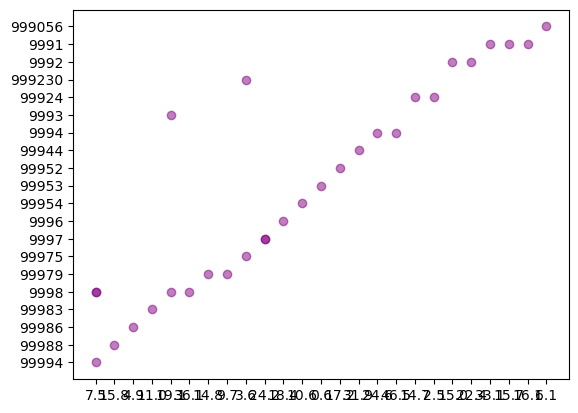

In [7]:
topemp = new_p[['EMP','EMP_S','PAYANN']].sort_values(by = 'EMP', ascending=False)[:30]
topemp[['EMP','EMP_S','PAYANN']]
plt.scatter(y = topemp['EMP'],  # x-axis data
            x = topemp['EMP_S'],    # y-axis data
            #marker = 'x',            # shape of point 
            alpha = .5,             # color scale to denote frequency (alpha = 1 <=> same color for everything)
            color = 'purple');

In [8]:
smalltest = new_p[['NAICS2017_LABEL',]]
smalltestagain = smalltest.groupby('NAICS2017_LABEL').size().reset_index(name='count')
smalltestagain.sort_values(by='count', ascending=False, inplace=True)

In [90]:
statecount = statedata[['NAME','FIRMPDEMP', 'NAICS2017_LABEL']]
statecount['FIRMPDEMP'] = statecount['FIRMPDEMP'].astype('int')
#statecount = statedata.groupby('NAME').size().reset_index(name='count')
statecount = statecount[(statecount['NAICS2017_LABEL']=='Professional, scientific, and technical services')]
statecount = statecount.groupby(['NAME'], as_index=False)['FIRMPDEMP'].sum()

statecount.sort_values(by='FIRMPDEMP', ascending=False, inplace=True)
statecount.rename(columns={'FIRMPDEMP': 'Science'}, inplace=True)

statecount.head(100)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_23844\3009930273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statecount['FIRMPDEMP'] = statecount['FIRMPDEMP'].astype('int')


,NAME,Science
4,California,2969350
9,Florida,1906104
43,Texas,1592296
32,New York,1454819
13,Illinois,908842
10,Georgia,686159
38,Pennsylvania,665825
46,Virginia,654986
30,New Jersey,641779
33,North Carolina,580373


In [93]:
statecountu = statedata[['NAME','FIRMPDEMP', 'NAICS2017_LABEL']]
statecountu['FIRMPDEMP'] = statecountu['FIRMPDEMP'].astype('int')
#statecount = statedata.groupby('NAME').size().reset_index(name='count')
statecountu = statecountu[(statecountu['NAICS2017_LABEL']=='Manufacturing')]
statecountu = statecountu.groupby(['NAME'], as_index=False)['FIRMPDEMP'].sum()
statecountu.sort_values(by='FIRMPDEMP', ascending=False, inplace=True)
statecountu.rename(columns={'FIRMPDEMP': 'Manufacturing'}, inplace=True)

statecountu.head(100)

C:\Users\Daniel\AppData\Local\Temp\ipykernel_23844\4037151442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  statecountu['FIRMPDEMP'] = statecountu['FIRMPDEMP'].astype('int')


,NAME,Manufacturing
4,California,862550
43,Texas,413788
32,New York,356269
9,Florida,310586
38,Pennsylvania,284655
35,Ohio,283924
13,Illinois,275450
49,Wisconsin,175302
33,North Carolina,174790
30,New Jersey,167079


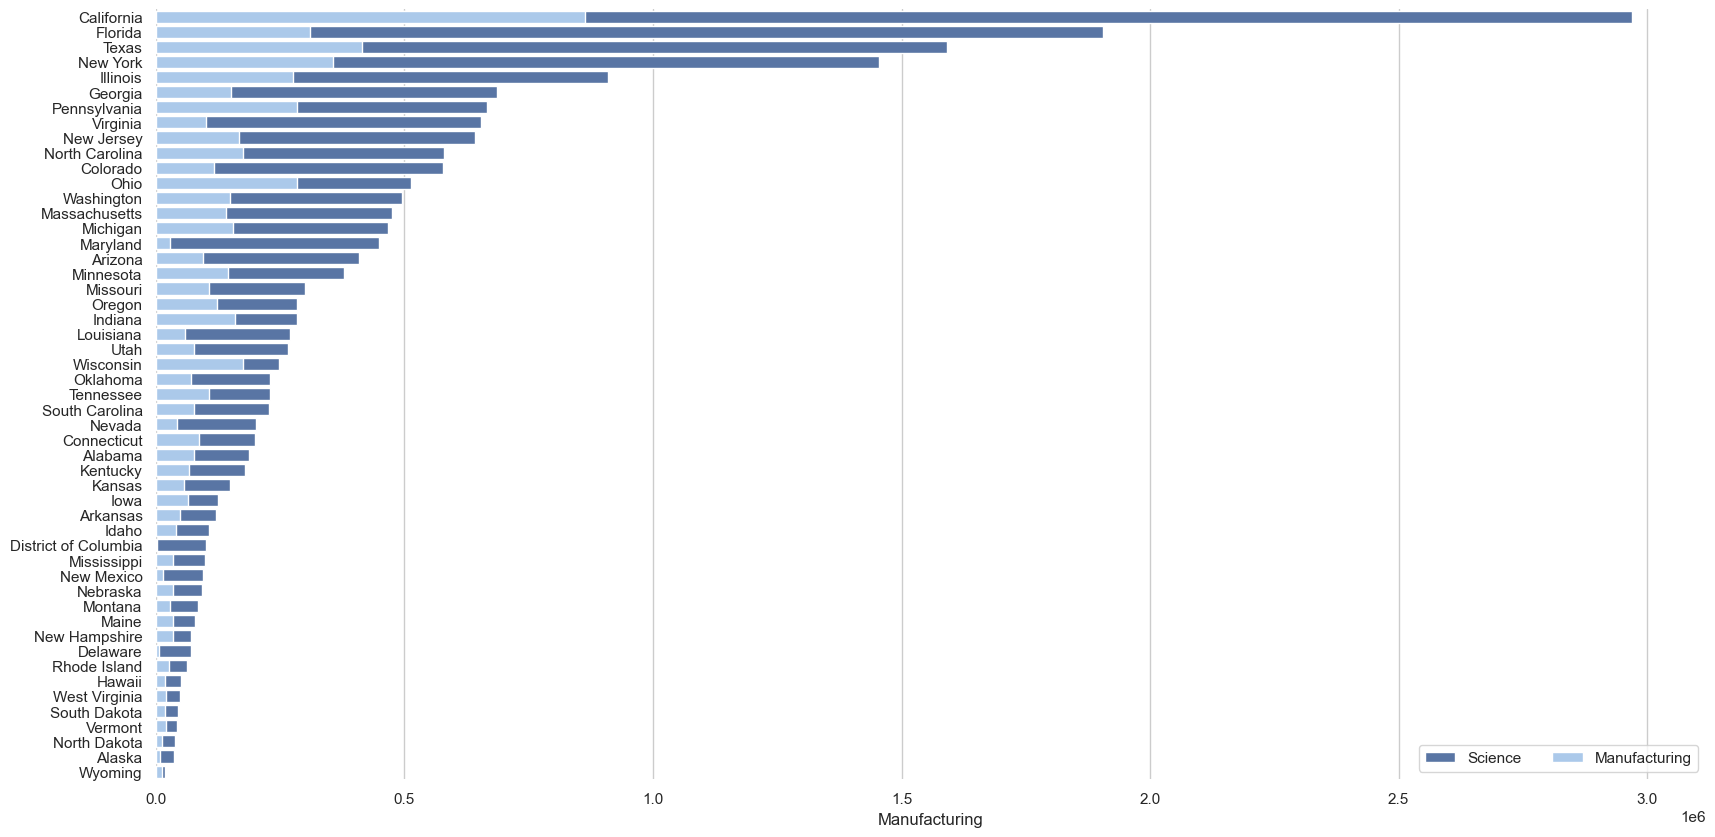

In [96]:
statecategoriesjoin = pd.merge(statecountu, statecount, on='NAME')
statecategoriesjoin.sort_values(by='Science', ascending=False, inplace=True)
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(20,10))
sns.set_color_codes("deep")
sns.barplot(x="Science", y="NAME", data=statecategoriesjoin,
            label="Science", color="b")    
sns.set_color_codes("pastel")
sns.barplot(x="Manufacturing", y="NAME", data=statecategoriesjoin,
            label="Manufacturing", color="b")
      
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="")
sns.despine(left=True, bottom=True)

In [10]:
firmus = new_p[['FIRMPDEMP','SEX_LABEL']]
firmus['FIRMPDEMP'] = firmus['FIRMPDEMP'].astype('int')
firmus = firmus[(firmus['SEX_LABEL']=='Female')|(firmus['SEX_LABEL']=='Male')]
firmus = firmus.groupby(['SEX_LABEL'], as_index=False)['FIRMPDEMP'].sum()
firmus


C:\Users\Daniel\AppData\Local\Temp\ipykernel_23844\1973670799.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  firmus['FIRMPDEMP'] = firmus['FIRMPDEMP'].astype('int')


,SEX_LABEL,FIRMPDEMP
0,Female,22794065
1,Male,74856729


<BarContainer object of 21 artists>

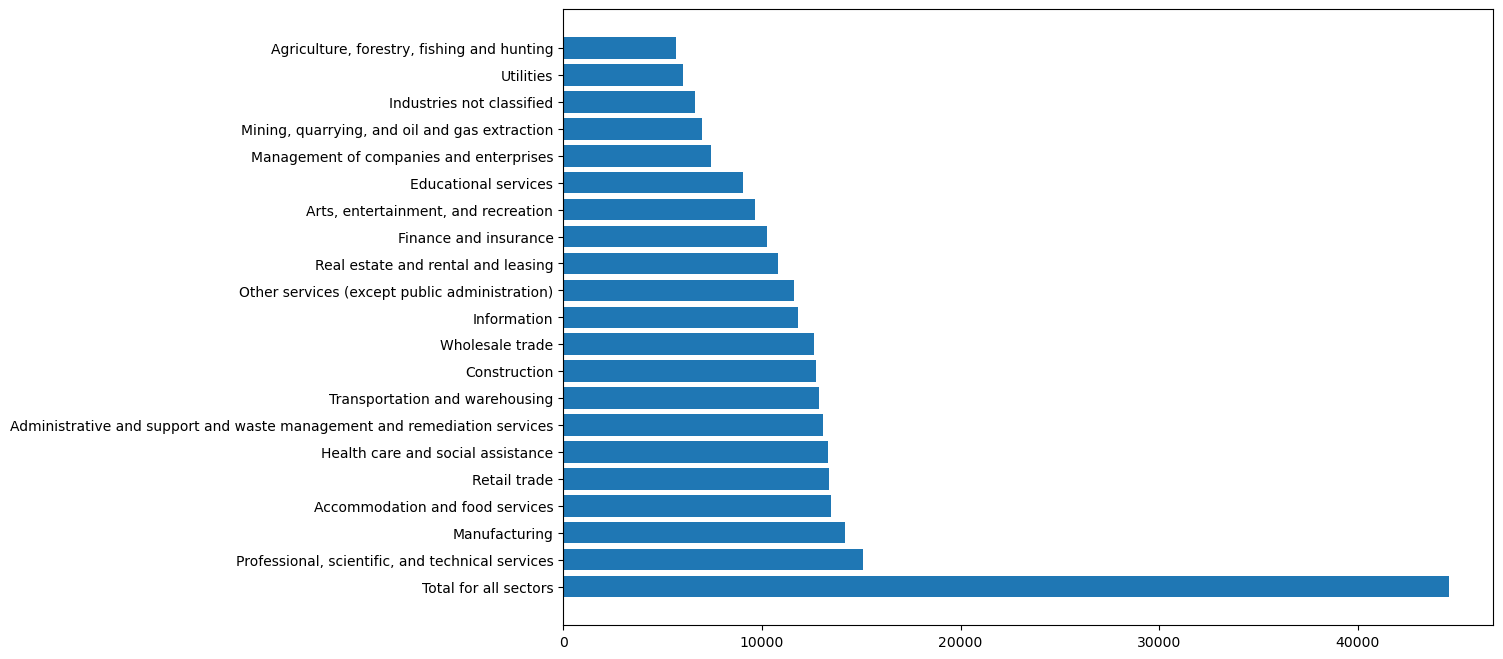

In [11]:
plt.figure(figsize = (12, 8))
#barplot
plt.barh(y = smalltestagain['NAICS2017_LABEL'], width = smalltestagain['count'])

In [84]:
smalltestagain

,NAICS2017_LABEL,count
17,Total for all sectors,44572
14,"Professional, scientific, and technical services",15082
11,Manufacturing,14192
0,Accommodation and food services,13483
16,Retail trade,13382
7,Health care and social assistance,13350
1,Administrative and support and waste managemen...,13101
18,Transportation and warehousing,12894
4,Construction,12716
20,Wholesale trade,12620
